In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('/content/drive/My Drive/data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [ ]:
df.dtypes

,0
Дата,object
Склад,int64
Контрагент,object
Номенклатура,object
Количество,int64


Сразу переведем столбец "Дата" в правильный формат

In [ ]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [ ]:
grouped_df = df.groupby('Дата').agg({'Количество': 'sum'})

Вывести несколько первых строк сгруппированных данных

In [ ]:
grouped_df.head()

,Количество
Дата,
2018-01-04,3734
2018-01-05,3643
2018-01-06,3193
2018-01-07,3298
2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

In [ ]:
grouped_df

,Количество
Дата,
2018-01-04,3734
2018-01-05,3643
2018-01-06,3193
2018-01-07,3298
2018-01-09,4055
...,...
2018-08-26,5302
2018-08-28,5983
2018-08-29,4969


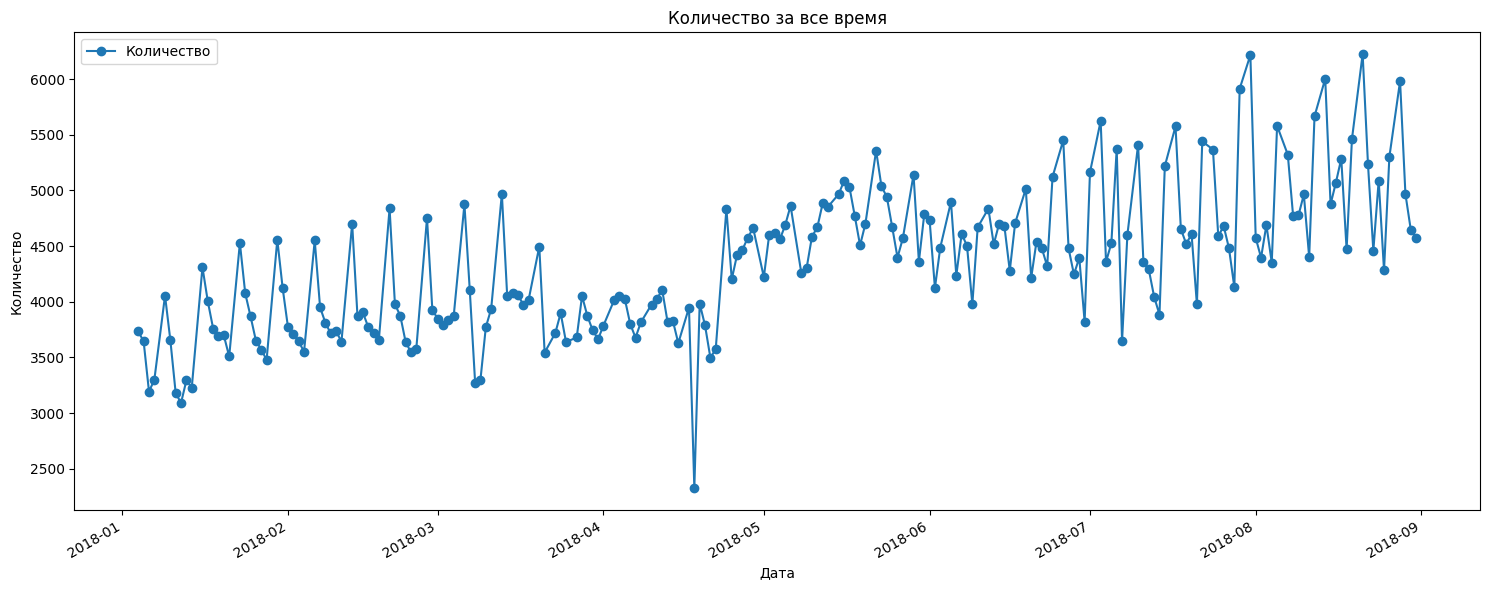

In [ ]:
grouped_df.plot(y='Количество', use_index=True, marker='o', figsize=(15, 6))
plt.title('Количество за все время')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график


На графике показаны данные о количестве (Количество) с января по сентябрь 2018 года. Видно, что значения имеют тенденцию к увеличению с течением времени, при этом присутствуют регулярные колебания, когда количество резко возрастает, а затем снижается, что может указывать на сезонные или циклические изменения. В конце апреля наблюдается сильный спад, после которого значения быстро восстанавливаются и продолжают расти. График выглядит изменчивым, что может свидетельствовать о влиянии внешних факторов на количество.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [ ]:
q1 = grouped_df['Количество'].quantile(0.25)
q3 = grouped_df['Количество'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_high = grouped_df[grouped_df['Количество'] > upper_bound]

outliers_low = grouped_df[grouped_df['Количество'] < lower_bound]

max_outlier_row = outliers_high.loc[outliers_high['Количество'].idxmax()]

min_outlier_row = outliers_low.loc[outliers_low['Количество'].idxmin()]

print("Границы:")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")
print("Строка с максимальным выбросом по количеству продаж:")
print(max_outlier_row)
print("Строка с минимальным выбросом по количеству продаж:")
print(min_outlier_row)

Границы:
Нижняя граница: 2499.5
Верхняя граница: 6023.5
Строка с максимальным выбросом по количеству продаж:
Количество    6226
Name: 2018-08-21 00:00:00, dtype: int64
Строка с минимальным выбросом по количеству продаж:
Количество    2326
Name: 2018-04-18 00:00:00, dtype: int64


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [ ]:
warehouse_3 = df[df['Склад'] == 3]

summer_months = warehouse_3[warehouse_3['Дата'].dt.month.isin([6, 7, 8])]

wednesdays = summer_months[summer_months['Дата'].dt.dayofweek == 2]

top_product = wednesdays.groupby('Номенклатура')['Количество'].sum().idxmax()
top_sales = wednesdays.groupby('Номенклатура')['Количество'].sum().max()

print(f"Топовый товар по продажам по средам за летние месяцы на складе 3: {top_product} с продажами: {top_sales}")

Топовый товар по продажам по средам за летние месяцы на складе 3: product_1 с продажами: 2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [ ]:
weather_df = pd.read_excel('/content/drive/My Drive/weather.xls')
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format="%d.%m.%Y %H:%M", dayfirst=True)

In [ ]:
weather_df['Дата'] = weather_df['Дата'].dt.date
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'])

In [ ]:
weather_df.head()

,Дата,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,2018-10-01,7.2,733.6,765.2,0.2,90.0,"Ветер, дующий с северо-востока",2,NaN,NaN,...,NaN,NaN,NaN,5.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,2018-10-01,8.5,733.4,764.9,0.7,90.0,"Ветер, дующий с севера",2,NaN,NaN,...,NaN,NaN,NaN,7.0,Следы осадков,12.0,NaN,NaN,NaN,NaN
2,2018-10-01,13.9,732.7,763.5,0.3,59.0,"Ветер, дующий с северо-северо-востока",1,NaN,NaN,...,NaN,NaN,10.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-01,15.8,732.4,763.0,0.2,51.0,"Ветер, дующий с западо-северо-запада",2,NaN,NaN,...,NaN,NaN,10.0,5.7,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-01,17.8,732.2,762.7,-0.1,42.0,"Ветер, дующий с юго-запада",2,NaN,NaN,...,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df = pd.merge(grouped_df, weather_df, on='Дата', how='inner')

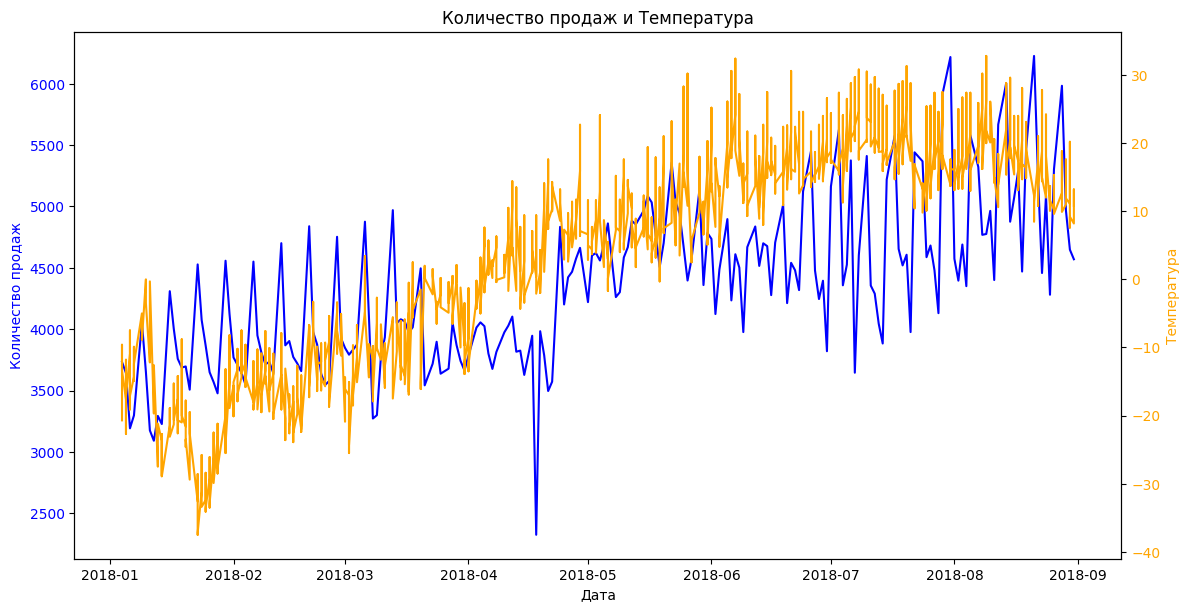

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(merged_df['Дата'], merged_df['Количество'], color='blue', label='Количество продаж')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['T'], color='orange', label='Температура')
ax2.set_ylabel('Температура', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.title('Количество продаж и Температура')
plt.show()

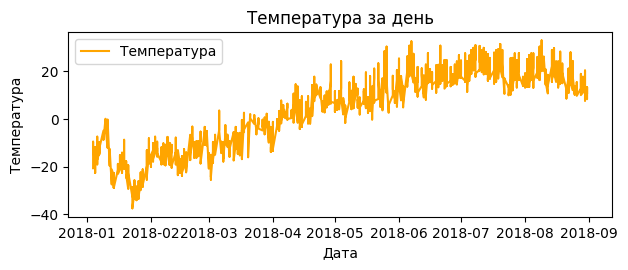

In [91]:
plt.subplot(2, 1, 2)
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='orange')
plt.title('Температура за день')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.legend()

plt.tight_layout()
plt.show()